In [4]:
from random import choices
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [3]:
def resamp_data(list):
    sim_list = choices(list, k=len(list)) 
    return(sim_list)

In [ ]:
resamps = 100
quantity = []

for r in range(resamps):
	# resample the data stored in dictionary "results_dict"
    samp_results = {key:[val(key, shot) for shot in resamp_data(results_dict[key])] for key in dict}

    # compute the quantity of interest from this particular resampling of the data
    quantity.append( process(samp_results) )

# find the standard deviation of the quantity over resamplings
std_devs = [np.std([quantity[j][key] for j in range(resamps)]) for key in dict]

In [41]:
resamps = 100

def resample_data(L,l):
    resamp_means = []
    string = '../data/N_flippable_' + 'L' + str(L) + 'l' + str(l) + '.dat'
    rhos = pd.read_csv(string, header=None, skiprows=1).to_numpy() / (L*L)
    N_runs = np.shape(rhos)[0]
    N_steps = np.shape(rhos)[1]

    for r in range(resamps):
        resamp_means.append(np.mean(choices(rhos[0], k=N_steps)))
    return(np.mean(resamp_means), np.std(resamp_means))

In [48]:
Ls    = (6, 12, 18)
mults = (0,1,2,3,4,5,6)

avgs  = np.zeros((len(Ls), len(mults)))
stds  = np.zeros((len(Ls), len(mults)))

for idx, L in enumerate(Ls):
    for jdx, mult in enumerate(mults):
        if mult == 6: continue
        l = int(mult*L/6)
        avgs[idx, jdx], stds[idx, jdx] = resample_data(L,l)

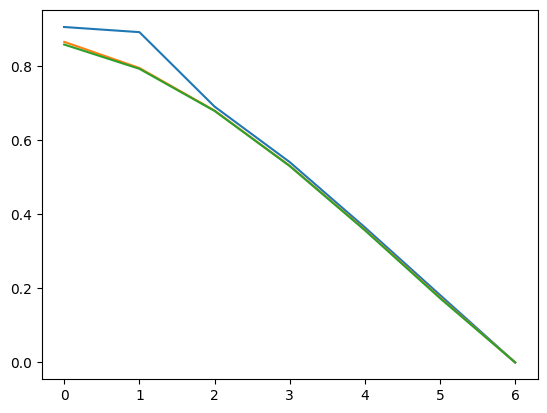

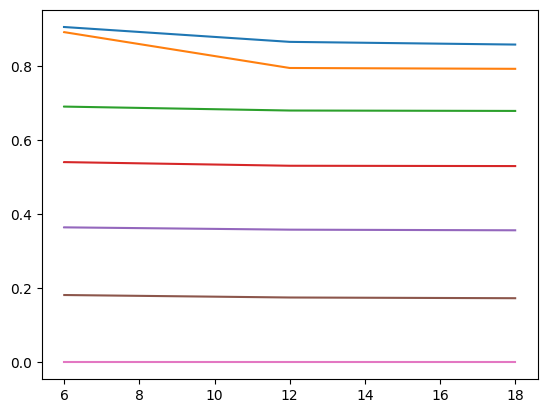

In [51]:
for idx, L in enumerate(Ls):
    plt.errorbar(mults, avgs[idx], yerr=stds[idx])
plt.show()

for jdx, mult in enumerate(mults):
    plt.errorbar(Ls, avgs[:,jdx], yerr=stds[:,jdx])
plt.show()